In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
data=pd.read_csv(r'C:\Users\Asus\Desktop\prodigy\Mall_Customers.csv')


In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.shape

(200, 5)

In [18]:
data.Gender.value_counts(normalize=True)*100

Female    56.0
Male      44.0
Name: Gender, dtype: float64

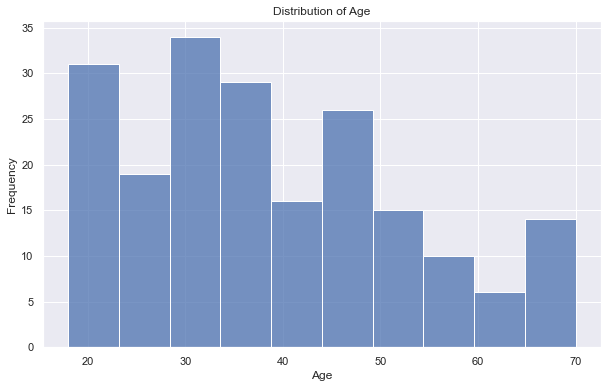

In [19]:

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

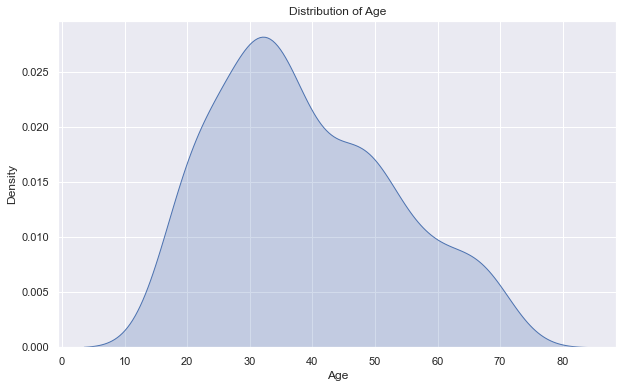

In [20]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Age', fill=True, common_norm=False)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Age')
plt.show()

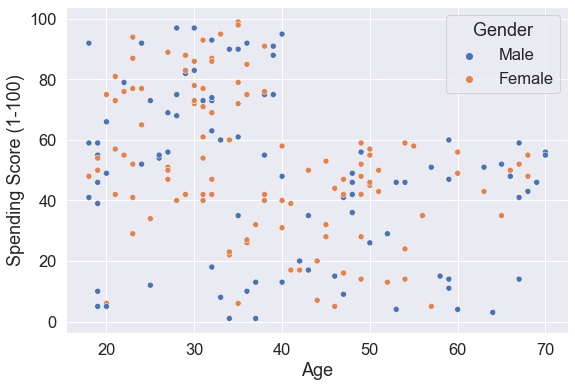

In [26]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=data)
plt.show()

NameError: name 'X' is not defined

In [8]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
x=data.iloc[:,[3,4]].values

In [11]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [34]:
inertia = model.inertia_
print("Inertia (3 clusters):", inertia)

Inertia (3 clusters): 181363.595959596


In [37]:
# Lets the Silhouette score for our model and assign it to the variable ss.
from sklearn.metrics import silhouette_score
ss = silhouette_score(x, model.labels_)
print("Silhouette Score (3 clusters):", ss)

Silhouette Score (3 clusters): 0.2968969162503008


In [38]:
# Let's use a for loop to build and train a K-Means model where n_clusters ranges from 2 to 12 inclusive. Each time a model is trained, we calculate the inertia and add it to the list
n_clusters = range(2, 13)
inertia_errors = []
silhouette_scores = []
for k in n_clusters:
    # build model
    model = KMeans(n_clusters=k, random_state=42)
    # Add 'for' loop to train model and calculate inertia, silhouette score.
    model.fit(x)
    #calculate inertia
    inertia_errors.append(model.inertia_)
    #calculate silhouette scores
    silhouette_scores.append(silhouette_score(x, model.labels_))
    
print("Inertia:", inertia_errors)
print()
print("Silhouette Scores:", silhouette_scores)

Inertia: [181363.595959596, 106348.37306211119, 73679.78903948837, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.83934915659, 21850.16528258563, 19672.07284901432, 17887.084456628643, 15917.60968942786]

Silhouette Scores: [0.2968969162503008, 0.46761358158775435, 0.4931963109249047, 0.553931997444648, 0.53976103063432, 0.5264283703685728, 0.45827056882053113, 0.4565077334305076, 0.45925273534781125, 0.43844724497454024, 0.4355277383491917]


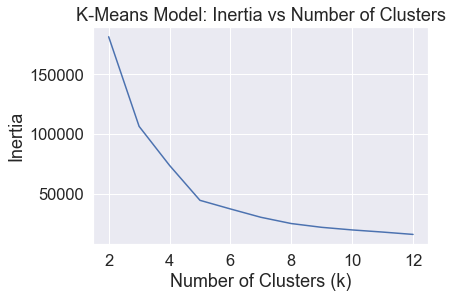

In [39]:
plt.plot(n_clusters, inertia_errors)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia vs Number of Clusters");

In [14]:
#training the kmeans clustering model
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=0)

#return a label for each data point on their cluster
y = kmeans.fit_predict(x)

print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

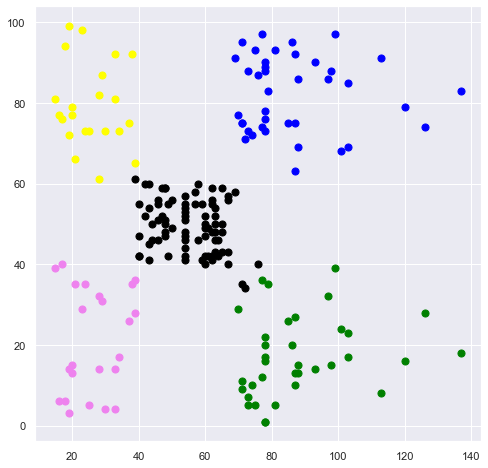

In [17]:
#plotting all the clusters and their centroids

plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50, c='green', label='cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],s=50, c='black', label='cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],s=50, c='blue', label='cluster 3')
plt.scatter(x[y==3,0],x[y==3,1],s=50, c='yellow', label='cluster 4')
plt.scatter(x[y==4,0],x[y==4,1],s=50, c='violet', label='cluster 5')

#plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,c='cyan', label='Centroids')
plt.title('Customer Group')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'